In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from statsmodels.api import GLM

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("Health Care.xlsx")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 1) Preliminary analysis:

#### 1.a) Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc:

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.shape

(303, 14)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df[df.duplicated(keep= False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


- 1) Data has 303 Observations (Rows), 13 Features (Columns) and a Target Variable.

- 2) Data has No Missing Values.

- 3) Data has a duplicate observation (Row 163 and Row 164 are Same). We can Remove One of These Rows.

#### 1.b) Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy:

In [20]:
df[df.duplicated(keep= "first")]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# We can Remove this Row From Data.

In [21]:
df[df.duplicated(keep= "first")].index

Int64Index([164], dtype='int64')

In [22]:
list(df[df.duplicated(keep= "first")].index)

[164]

In [24]:
df= df.drop(list(df[df.duplicated(keep= "first")].index), axis= 0)

In [25]:
df.shape

(302, 14)

In [26]:
df[df.duplicated(keep= "first")]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


- Duplicate Row is removed from Data.

- As seen earlier, we have no missing values in Data.

### 2) Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

#### 2.a) Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data:

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


<Figure size 576x432 with 0 Axes>

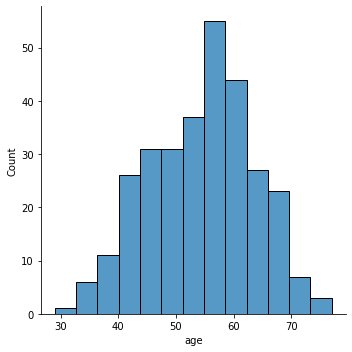

In [29]:
plt.figure(figsize= (8,6))

sns.displot(data= df, x= "age")

plt.show()

- Age is Continuous Feature and Seems to be Normally Distributed.

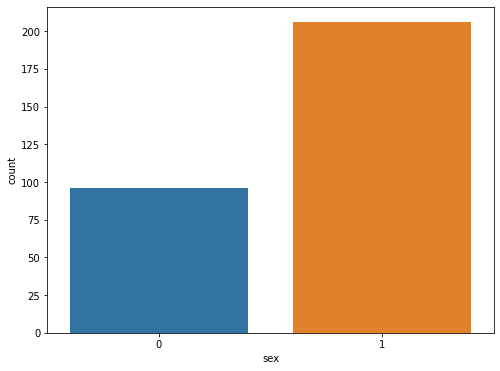

In [30]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "sex")

plt.show()

In [31]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

- 0: Female, 1: Male
- We Have Twice as many Observations for Male than Female in our Data.

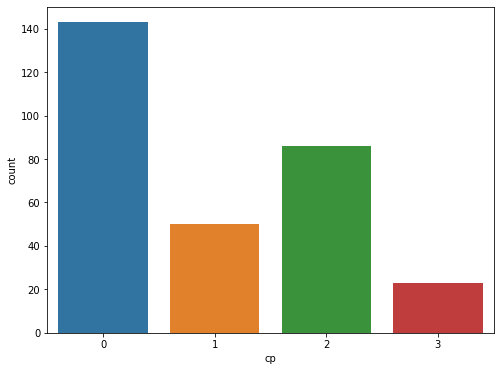

In [32]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "cp")

plt.show()

In [33]:
df["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

- Chest Pain (cp): seems to be ordinal Categorical Variable.
- We Won't have to get Dummy Variables for "cp" as it's ordinal in nature.

<Figure size 576x432 with 0 Axes>

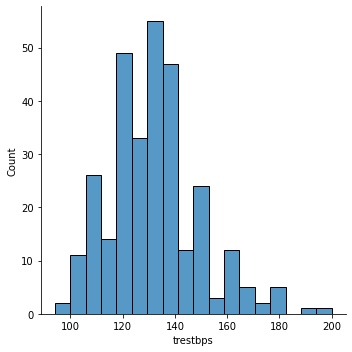

In [34]:
plt.figure(figsize= (8,6))

sns.displot(data= df, x= "trestbps")

plt.show()

- Resting Blood Pressure "trestbps" is Continuous and seems to be Normally Distributed with Some Outliers at Right Tail.

<Figure size 576x432 with 0 Axes>

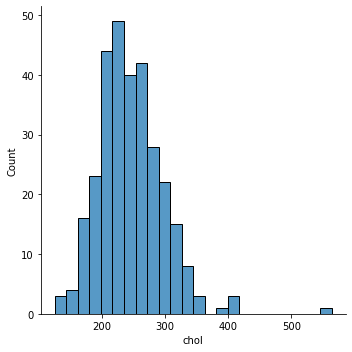

In [35]:
plt.figure(figsize= (8,6))

sns.displot(data= df, x= "chol")

plt.show()

- Cholesterol "chol" is Continuous and seems to be Normally Distributed with Some Outliers at Right Tail.

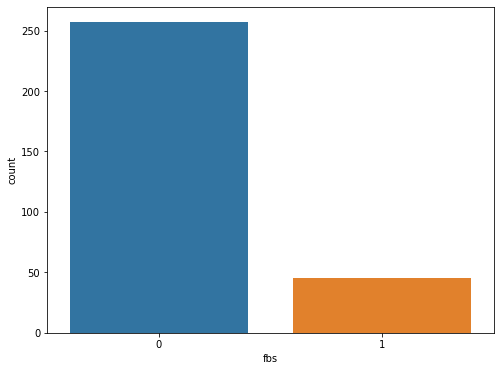

In [36]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "fbs")

plt.show()

In [37]:
df["fbs"].value_counts()

0    257
1     45
Name: fbs, dtype: int64

- Fasting Blood Sugar "fbs" is Ordinal Categorical Feature.

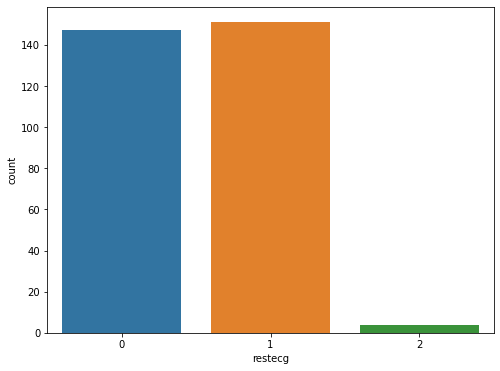

In [38]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "restecg")

plt.show()

In [39]:
df["restecg"].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

- Resting electrocardiographic results "restecg" is Ordinal Categorical Feature.

<Figure size 576x432 with 0 Axes>

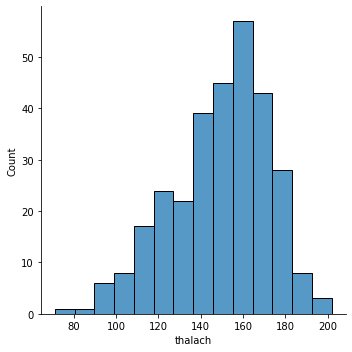

In [40]:
plt.figure(figsize= (8,6))

sns.displot(data= df, x= "thalach")

plt.show()

- Maximum Heart Rate Achieved "thalach" is Continuous Feature and it is Left Skewed.

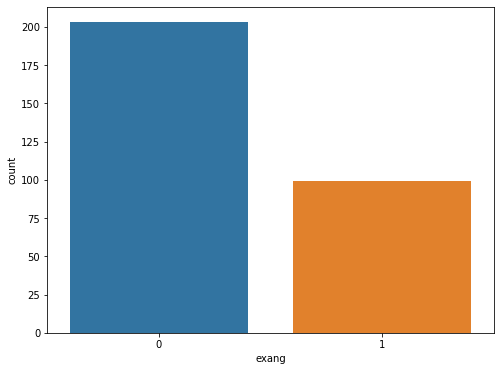

In [41]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "exang")

plt.show()

In [42]:
df["exang"].value_counts()

0    203
1     99
Name: exang, dtype: int64

- Exercise Induced Enigma "exang" is Categorical Feature.

<Figure size 576x432 with 0 Axes>

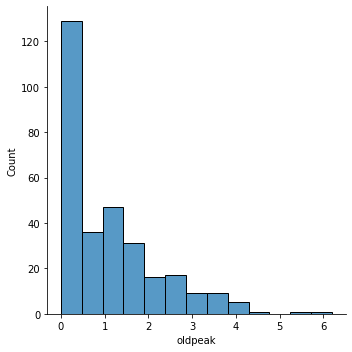

In [43]:
plt.figure(figsize= (8,6))

sns.displot(data= df, x= "oldpeak")

plt.show()

- ST depression induced by exercise relative to rest "oldpeak" is Continuous feature and is Highly Right Skewed. 

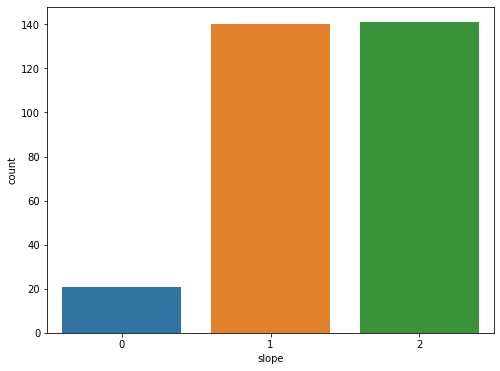

In [44]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "slope")

plt.show()

In [45]:
df["slope"].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

- Slope of the peak exercise ST segment "slope" is Ordinal Categorical Feature.

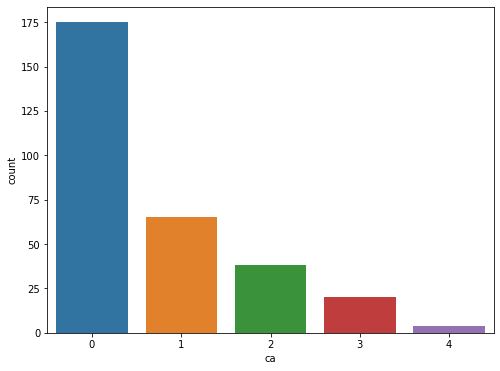

In [46]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "ca")

plt.show()

In [47]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

- Number of major vessels (0-3) colored by fluoroscopy "ca" is Ordinal Categorical Feature.

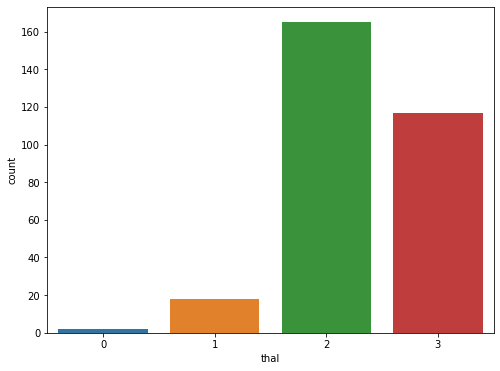

In [48]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "thal")

plt.show()

In [49]:
df["thal"].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

- Thalassaemia "thal" is Nominal Categorical Variable.

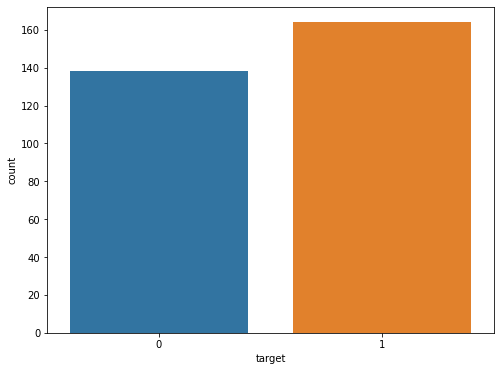

In [50]:
plt.figure(figsize= (8,6))

sns.countplot(data= df, x= "target")

plt.show()

In [51]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

- "Target" is our Target Variable and we have No Class Imbalance here.

#### 2.b) Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot:

In [52]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

- All the Features have Numeric Data Type in Data.

- We won't be able to tell apart Numeric and Categorical Variables Using Data Types.

- We will have to use How Many Unique Values are there in Each Feature to tell apart Numeric and Categorical Features.

In [53]:
for col in df.columns:
    print(f"Number of Unique Values in {col} : {df[col].nunique()}")

Number of Unique Values in age : 41
Number of Unique Values in sex : 2
Number of Unique Values in cp : 4
Number of Unique Values in trestbps : 49
Number of Unique Values in chol : 152
Number of Unique Values in fbs : 2
Number of Unique Values in restecg : 3
Number of Unique Values in thalach : 91
Number of Unique Values in exang : 2
Number of Unique Values in oldpeak : 40
Number of Unique Values in slope : 3
Number of Unique Values in ca : 5
Number of Unique Values in thal : 4
Number of Unique Values in target : 2


- "age", "trestbps", "chol", "thalach", "oldpeak" are continuous Feature.
- All Other Features are Categorical.

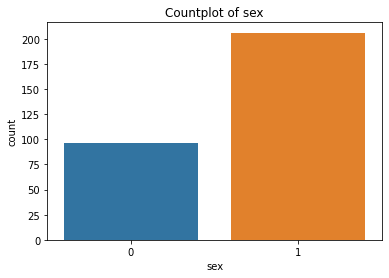

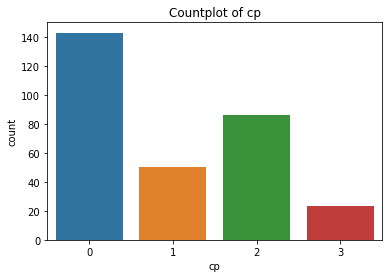

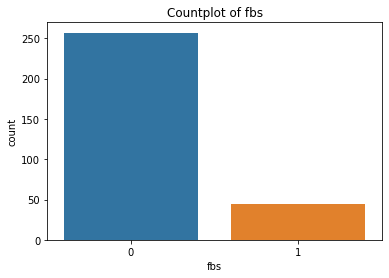

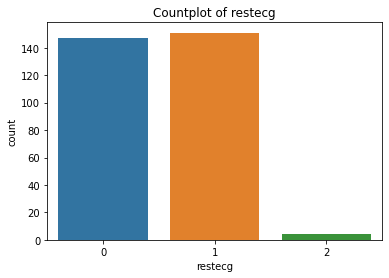

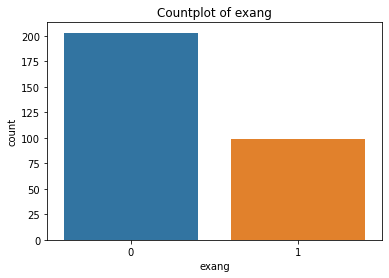

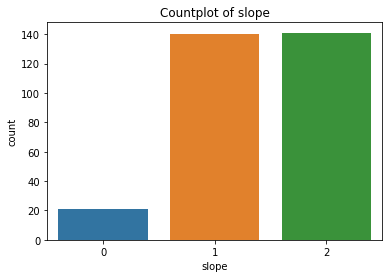

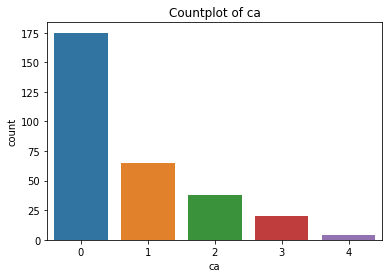

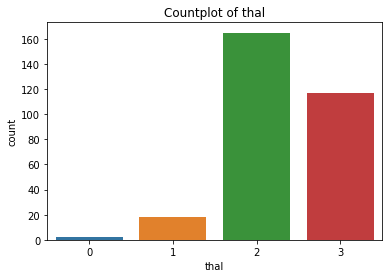

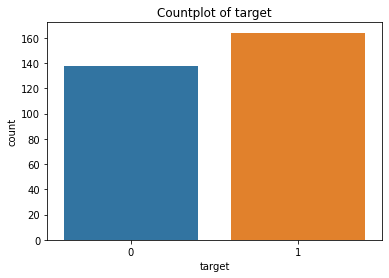

In [56]:
for col in df.columns:
    
    if df[col].nunique() <= 5:
        
        plt.figure(figsize= (6,4))

        sns.countplot(data= df, x= col)
        
        plt.title(f"Countplot of {col}")

        plt.show()

#### 2.c) Study the occurrence of CVD across the Age category:

<Figure size 576x432 with 0 Axes>

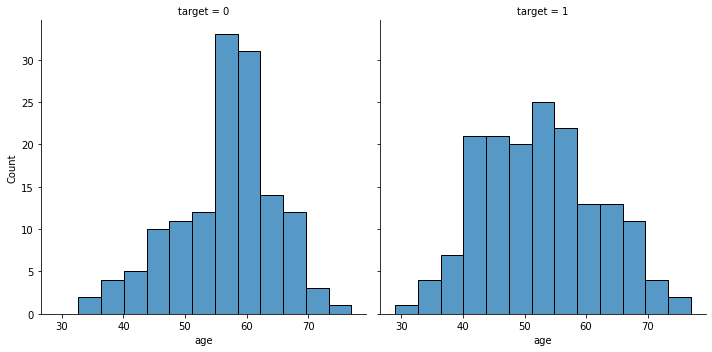

In [57]:
plt.figure(figsize= (8,6))

sns.displot(data= df, x= "age", col= "target")

plt.show()

- 40-70 seems to be the Age range Where there are more chances of Cardiovascular Diseases.
- Although, looking at target= 0 graph, 55-62 seems to be the Age Range in which Amny Observations from Our Data have no CVD.
- Also, CVD seems to be present in all Age Ranges in our Data, which can be a Cause of Concern.

#### 2.d) Study the composition of all patients with respect to the Sex category:

In [58]:
# We will Compare Features of all Observations with respect to Gender.

<Figure size 432x288 with 0 Axes>

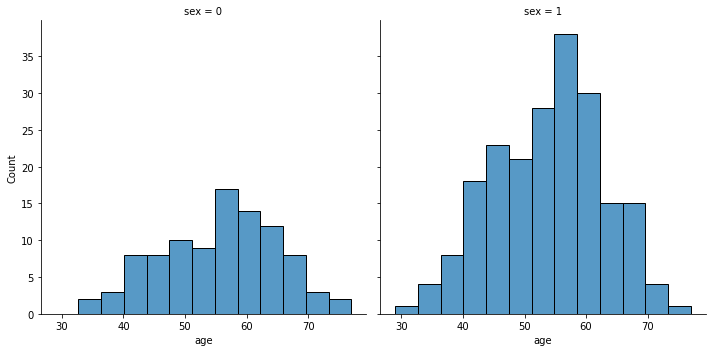

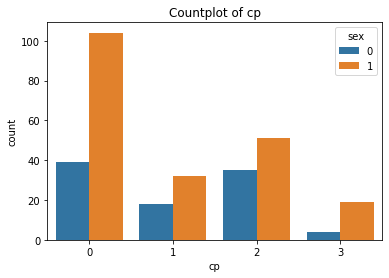

<Figure size 432x288 with 0 Axes>

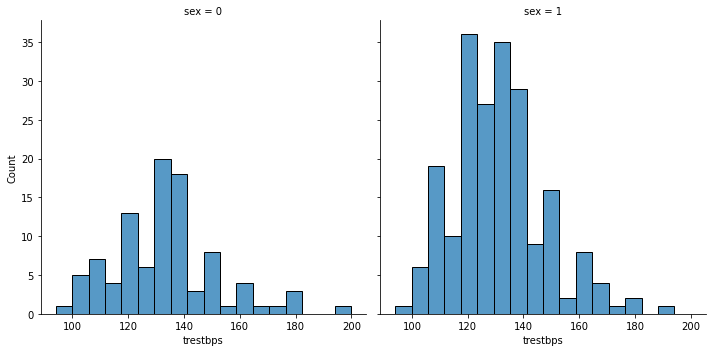

<Figure size 432x288 with 0 Axes>

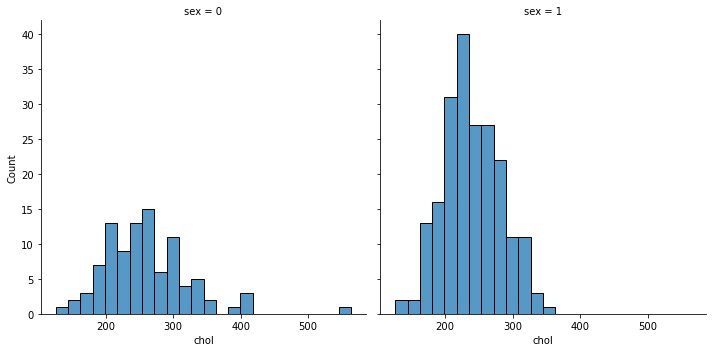

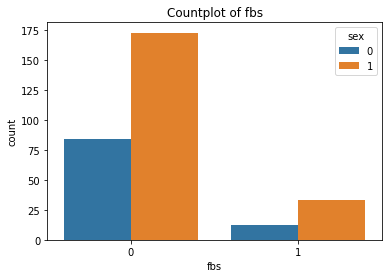

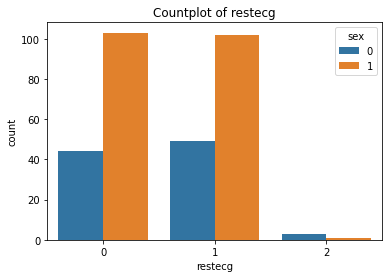

<Figure size 432x288 with 0 Axes>

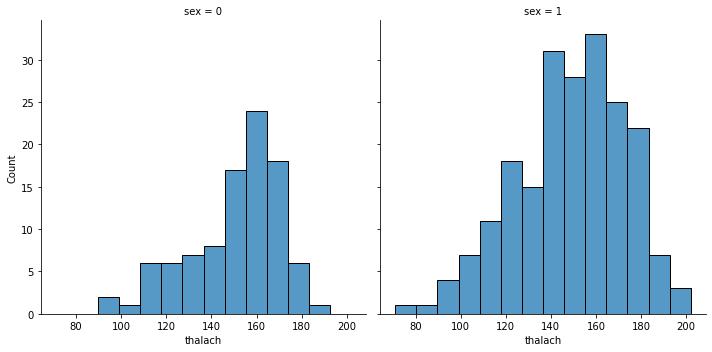

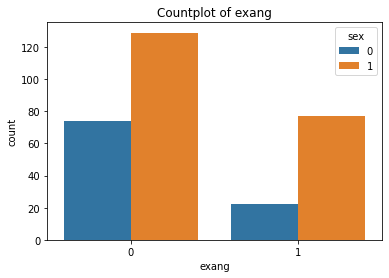

<Figure size 432x288 with 0 Axes>

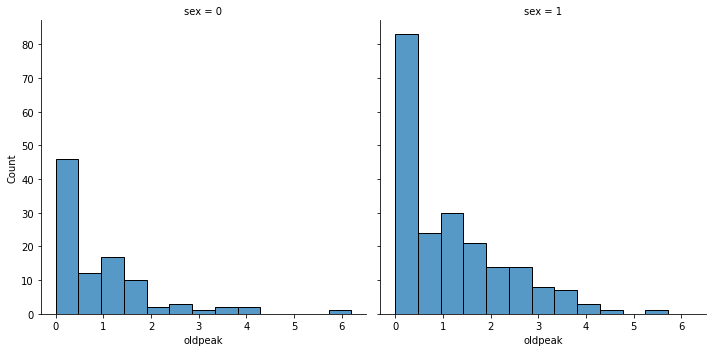

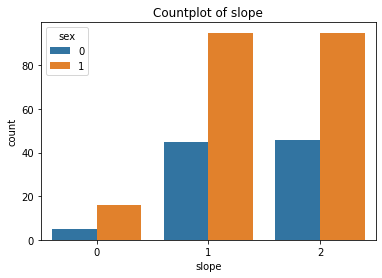

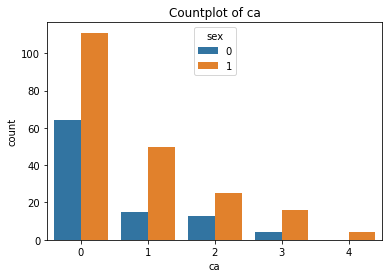

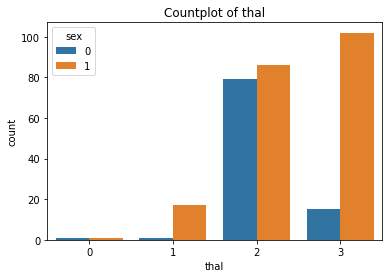

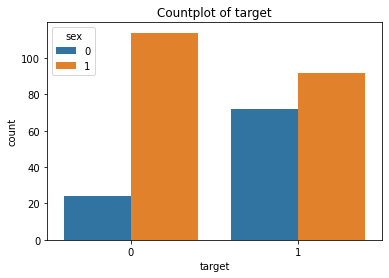

In [62]:
for cols in df.drop("sex",axis= 1).columns:
    
    if df[cols].nunique() <= 5:
        
        plt.figure(figsize= (6,4))

        sns.countplot(data= df, x= cols, hue= "sex")
        
        plt.title(f"Countplot of {cols}")

        plt.show()
        
    else:
        
        plt.figure(figsize= (6,4))

        sns.displot(data= df, x= cols, col= "sex")
        
        #plt.title(f"Distribution of {cols} by Gender:")

        plt.show()
        

#### 2.e) Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient:

<Figure size 432x288 with 0 Axes>

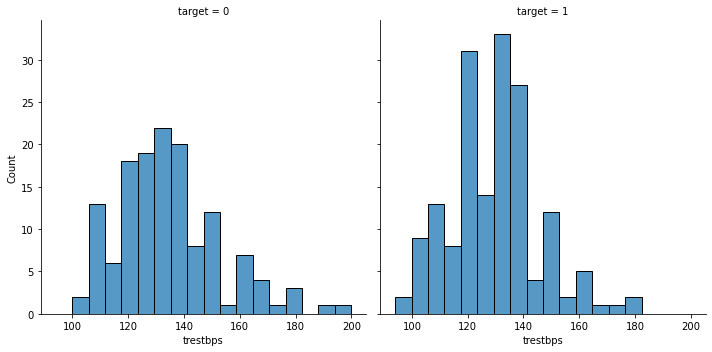

In [68]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "trestbps", col= "target")

plt.show()

- We have some observations with very High Resting Blood Pressure values without occurence of CVD.
- In general, we can see that Resting Blood Pressure values from 120-160 has more chances of CVD.
- Still, This feature alone can not be said to be conclusive of CVD.

#### 2.f) Describe the relationship between cholesterol levels and a target variable:

<Figure size 432x288 with 0 Axes>

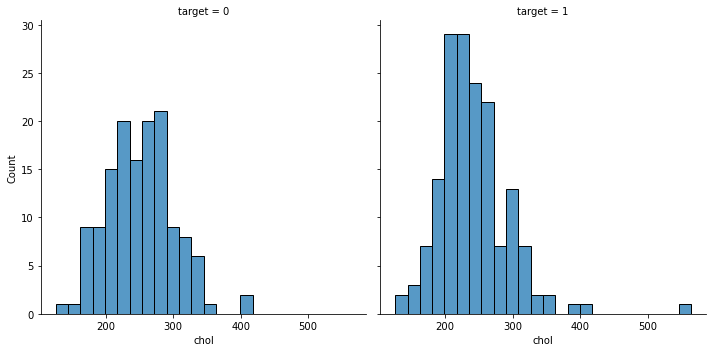

In [72]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "chol", col= "target")

plt.show()

- Here too, No considerable conclusion can be made about CVD by Cholesterol Levels alone.

#### 2.g) State what relationship exists between peak exercising and the occurrence of a heart attack:

<Figure size 432x288 with 0 Axes>

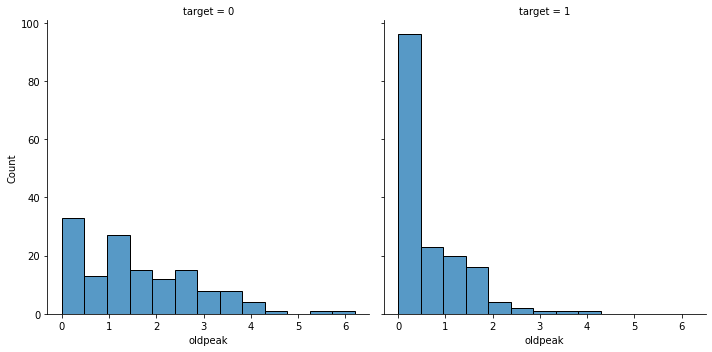

In [73]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "oldpeak", col= "target")

plt.show()

- As can be seen above, Lower Values of ST Depression Induced by Exercise relative to Rest clearly has more chanced of CVD Occurence.

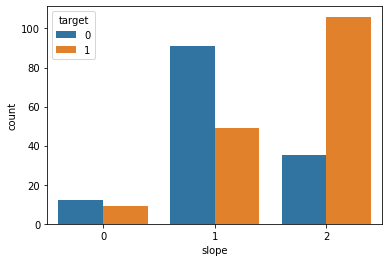

In [76]:
plt.figure(figsize= (6,4))

sns.countplot(data= df, x= "slope", hue= "target")

plt.show()

- Clear Relationship Between Slope of the Peak Exercise ST Segment and Occurence of CVD, having more value of "slope" clearly has more chances of CVD Occurence.

#### 2.h) Check if thalassemia is a major cause of CVD:

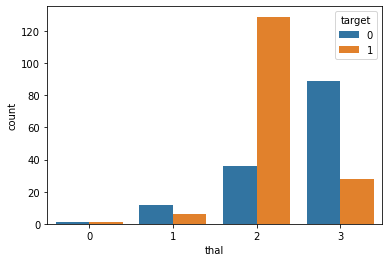

In [79]:
plt.figure(figsize= (6,4))

sns.countplot(data= df, x= "thal", hue= "target")

plt.show()

- As can be seen clearly, Thalassemia seems to be major Factor in Occurence of CVD.

#### 2.i) List how the other factors determine the occurrence of CVD:

In [80]:
# Checking Correlation of Features with Target:

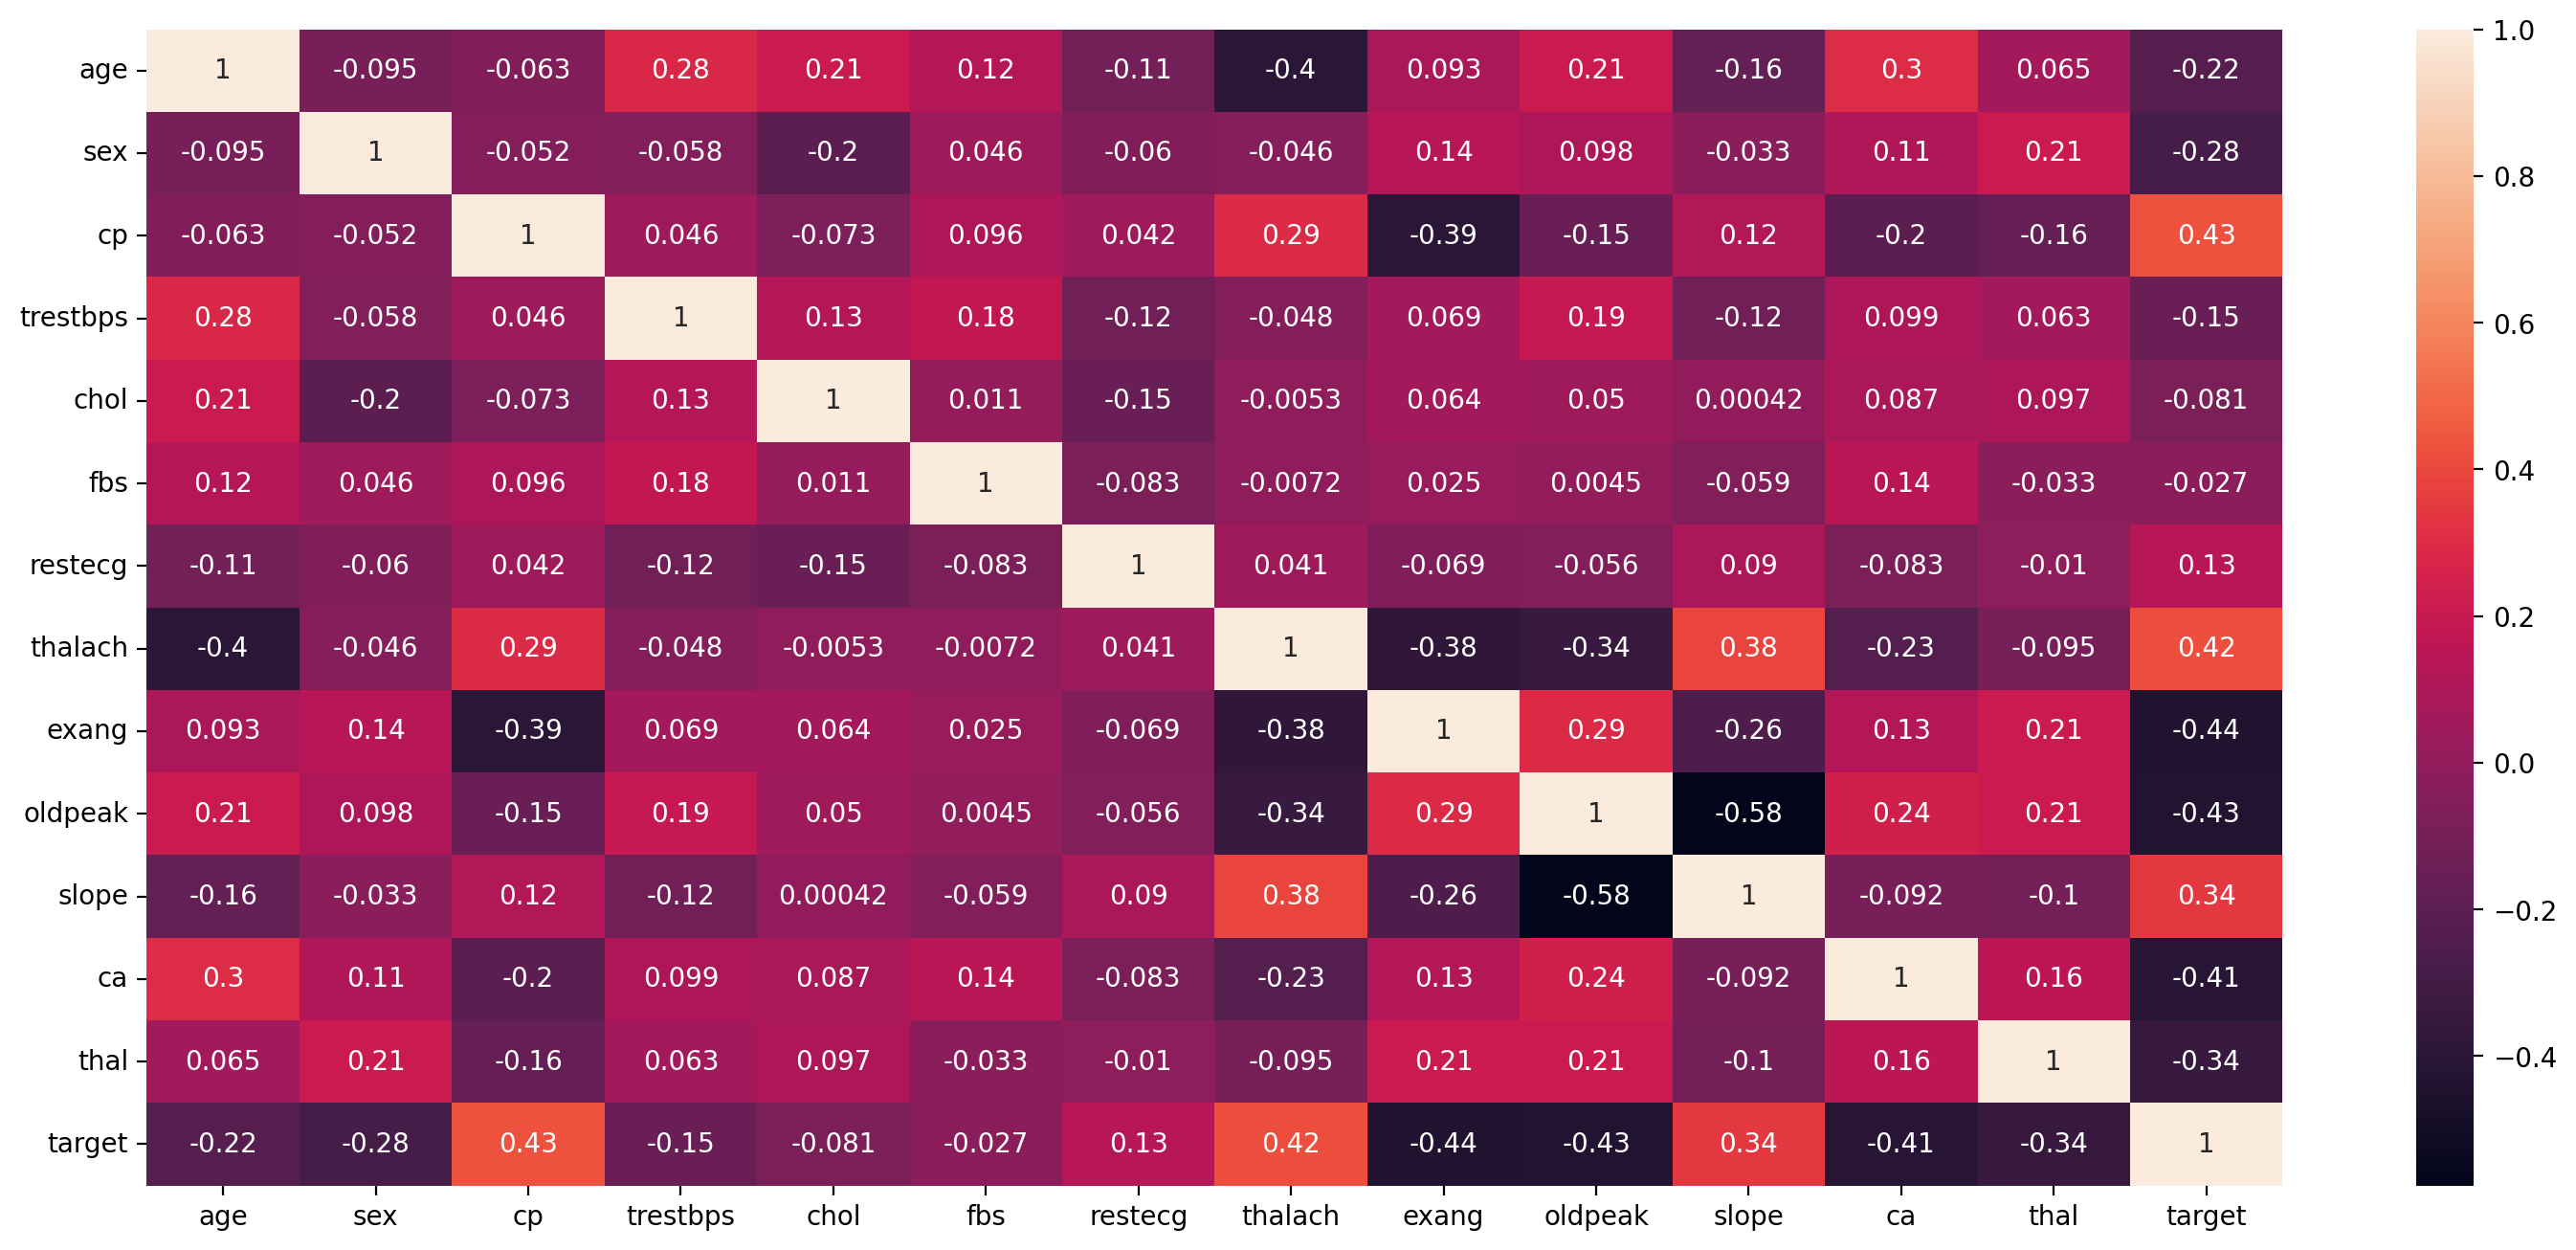

In [86]:
plt.figure(figsize= (18,8), dpi= 200)

sns.heatmap(df.corr(), annot= True)

plt.show()

- Chest Pain (cp), Maximum Heart Rate Achieved (thalach), Slope of the peak exercise ST segment (slope) have Decently High Positive Correlation with Occurence of CVD.

- Exercise Induced Enigma (exang), ST depression induced by exercise relative to rest (oldpeak), Number of major vessels (0-3) colored by fluoroscopy (ca) and Thalassemia (thal) have Decently High Negative Correlation with Occurence of CVD.

- Cholesterol (chol) and Fasting Blood Sugar (fbs) have Very Low Correlation to Heart Disease.

#### 2.j) Use a pair plot to understand the relationship between all the given variables:

<Figure size 1200x800 with 0 Axes>

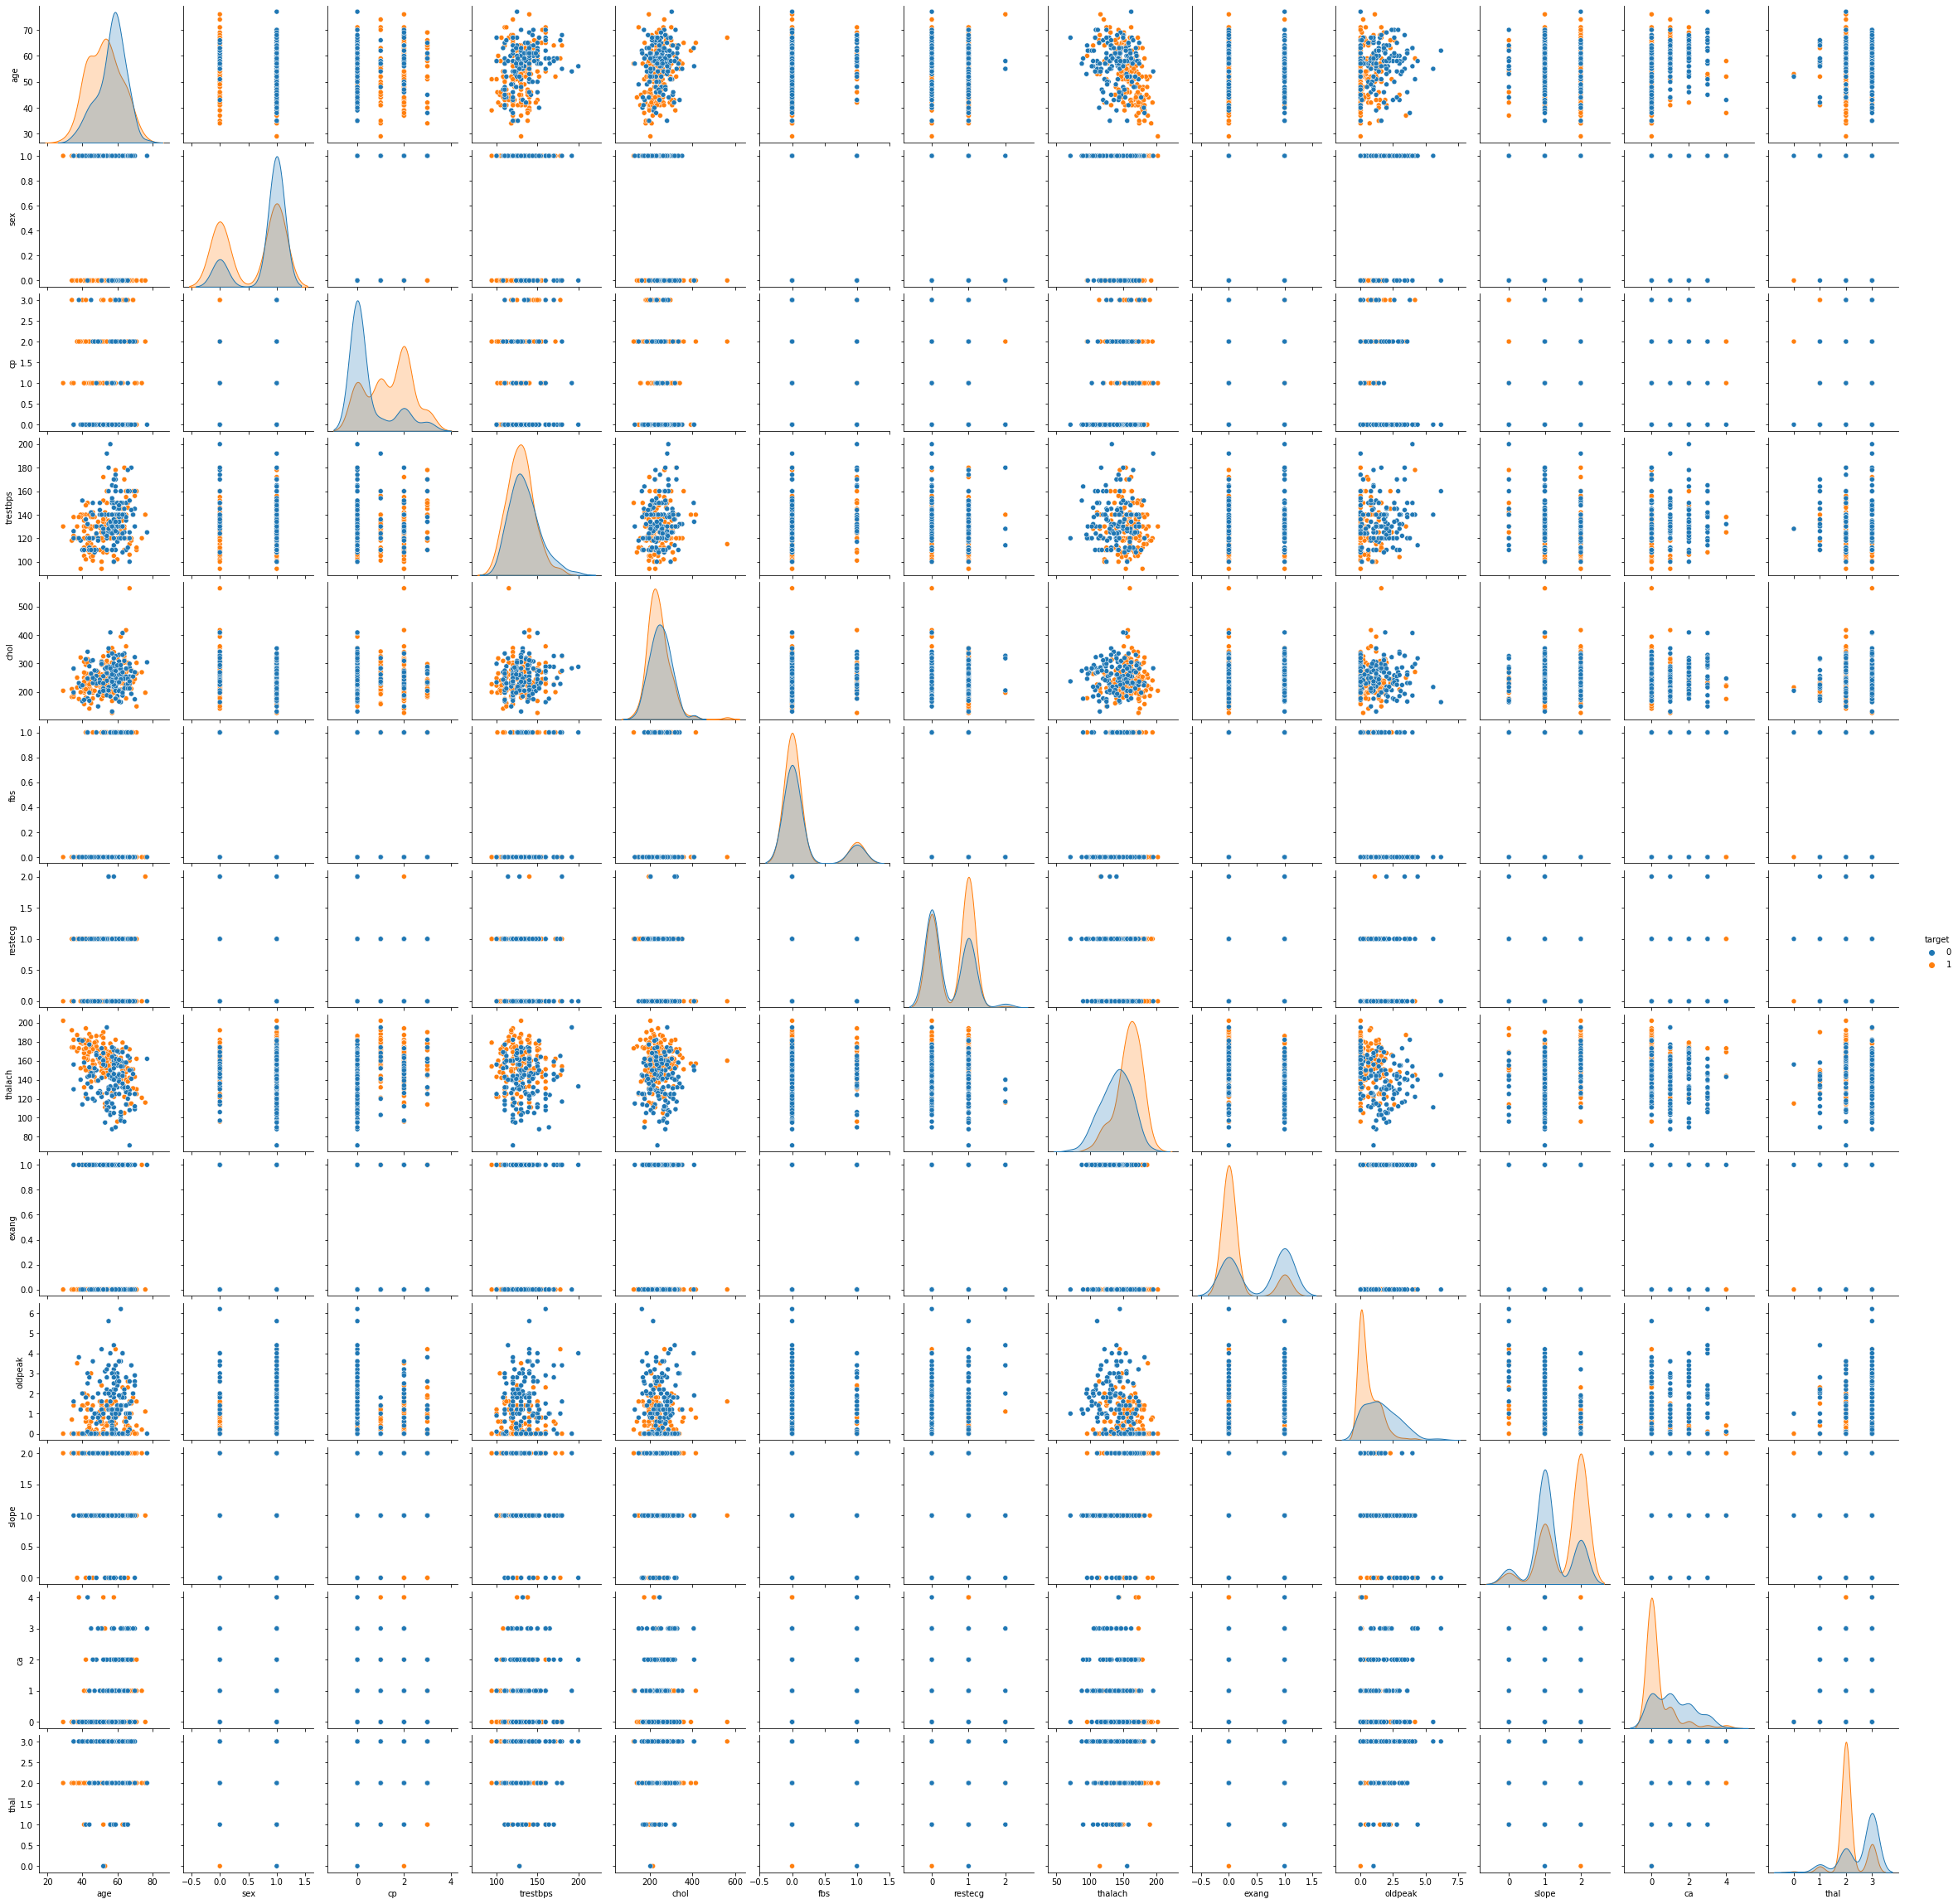

In [91]:
plt.figure(dpi= 200)

sns.pairplot(df, hue= "target")

plt.show()

- There aren't any Clearly Discernible Relationship Between any of the Features.

### 3) Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection:

**Seperating Features and Target in Different Data Frames:**

In [93]:
# Features:

x = df.drop("target", axis= 1)

In [94]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [95]:
x.shape

(302, 13)

In [96]:
# Target:

y = df["target"]

In [97]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [98]:
y.shape

(302,)

**Using Generalized Linear Model from statsmodel library to determine which Features are Significant in Decidind Target Variable.**

In [99]:
glm_model = GLM(y, x)

In [100]:
glm_results = glm_model.fit()

In [102]:
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                            GLM   Df Residuals:                      289
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.12814
Method:                          IRLS   Log-Likelihood:                -111.63
Date:                Sat, 26 Nov 2022   Deviance:                       37.034
Time:                        22:24:26   Pearson chi2:                     37.0
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6249
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0035      0.002      1.503      0.133      -0.001       0.008
sex           -0.1706      0.047     -3.652      0.000      -0.262      -0.079
cp             0.1091      0.023      4.812      0.000       0.065       0.154
trestbps      -0.0008      0.001     -0.708      0.479      -0.003       0.001
chol          -0.0001      0.000     -0.254      0.799      -0.001       0.001
fbs            0.0084      0.060      0.139      0.889      -0.110       0.126
restecg        0.0686      0.040      1.728      0.084      -0.009       0.146
thalach        0.0050      0.001      5.605      0.000       0.003       0.007
exang         -0.1202      0.051     -2.350      0.019      -0.221      -0.020
oldpeak       -0.0526      0.023     -2.274      0.023      -0.098      -0.007
slope          0.0887      0.043      2.078      0.038       0.005       0.172
ca            -0.1120      0.023     -4.924      0.000      -0.157      -0.067
thal          -0.1021      0.036     -2.866      0.004      -0.172      -0.032
==============================================================================
"""

- There are Some Features which Have p-Value > 0.05.

- Those Features are not Significant in Predicting Target Variable.

- We will Build our Model Twice, once Using all The Features and Once Using Only Those Features deemed Significant by GLM.

**Creating new Data Frame with Feature deemed Significan by GLM.**

In [104]:
glm_results.pvalues

age         1.329240e-01
sex         2.602821e-04
cp          1.491747e-06
trestbps    4.789596e-01
chol        7.991127e-01
fbs         8.894247e-01
restecg     8.391343e-02
thalach     2.086209e-08
exang       1.879360e-02
oldpeak     2.297834e-02
slope       3.773797e-02
ca          8.465524e-07
thal        4.157151e-03
dtype: float64

In [105]:
glm_results.pvalues[glm_results.pvalues < 0.05]

sex        2.602821e-04
cp         1.491747e-06
thalach    2.086209e-08
exang      1.879360e-02
oldpeak    2.297834e-02
slope      3.773797e-02
ca         8.465524e-07
thal       4.157151e-03
dtype: float64

In [106]:
significant_cols = list(glm_results.pvalues[glm_results.pvalues < 0.05].index)

In [107]:
significant_cols

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [112]:
x_glm = x[significant_cols].copy()

In [113]:
x_glm.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,1,3,150,0,2.3,0,0,1
1,1,2,187,0,3.5,0,0,2
2,0,1,172,0,1.4,2,0,2
3,1,1,178,0,0.8,2,0,2
4,0,0,163,1,0.6,2,0,2


### 4) Train Test Split:

**Train Test Split of Datafrmae with All Features:**

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


**Train Test Split of Datafrmae with GLM Features:**

In [116]:
x_glm_train, x_glm_test, y_train, y_test = train_test_split(x_glm, y, test_size= 0.2, random_state= 42)

In [117]:
print(x_glm_train.shape)
print(x_glm_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 8)
(61, 8)
(241,)
(61,)


### 5) Scalling:

**Scalling of Datafrmae with All Features:**

In [118]:
sc_all = StandardScaler()

In [119]:
temp = sc_all.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.350641,0.731459,0.000000,-0.630711,0.927138,-0.391293,0.890028,0.549139,-0.659184,-0.895837,0.965436,-0.683490,-0.545762
1,1.487426,0.731459,0.966493,2.753363,0.526980,2.555631,-0.991522,0.012071,1.517027,0.543474,-0.684707,-0.683490,1.140502
2,1.378270,0.731459,-0.966493,-0.348705,0.145878,2.555631,0.890028,0.593894,-0.659184,-0.715923,-0.684707,1.350103,1.140502
3,0.068393,-1.367131,0.000000,0.215308,0.069658,-0.391293,-0.991522,0.504383,-0.659184,0.363560,-0.684707,-0.683490,-0.545762
4,1.050801,0.731459,0.966493,0.497314,1.689342,-0.391293,0.890028,0.370116,-0.659184,-0.895837,0.965436,-0.683490,-0.545762


In [120]:
temp = sc_all.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.068393,0.731459,-0.966493,0.046104,2.032334,-0.391293,0.890028,-0.793531,1.517027,0.183647,-0.684707,0.333307,1.140502
1,1.050801,0.731459,0.966493,-0.348705,1.193909,-0.391293,0.890028,-0.838286,1.517027,0.723388,-0.684707,-0.683490,1.140502
2,0.286705,0.731459,0.966493,1.061326,-2.293175,2.555631,0.890028,1.041451,-0.659184,-0.715923,0.965436,0.333307,1.140502
3,1.269113,0.731459,0.000000,1.625339,-0.006563,-0.391293,0.890028,-1.330598,1.517027,-0.895837,-0.684707,2.366899,-2.232025
4,1.814896,-1.367131,0.966493,-1.194723,0.355484,2.555631,-0.991522,-0.883042,-0.659184,-0.895837,0.965436,0.333307,-0.545762


**Scalling of Datafrmae with GLM Features:**

In [121]:
sc_glm = StandardScaler()

In [122]:
temp = sc_glm.fit_transform(x_glm_train)
x_glm_train = pd.DataFrame(temp, columns= x_glm_train.columns)
x_glm_train.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.731459,0.000000,0.549139,-0.659184,-0.895837,0.965436,-0.683490,-0.545762
1,0.731459,0.966493,0.012071,1.517027,0.543474,-0.684707,-0.683490,1.140502
2,0.731459,-0.966493,0.593894,-0.659184,-0.715923,-0.684707,1.350103,1.140502
3,-1.367131,0.000000,0.504383,-0.659184,0.363560,-0.684707,-0.683490,-0.545762
4,0.731459,0.966493,0.370116,-0.659184,-0.895837,0.965436,-0.683490,-0.545762


In [123]:
temp = sc_glm.transform(x_glm_test)
x_glm_test = pd.DataFrame(temp, columns= x_glm_test.columns)
x_glm_test.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.731459,-0.966493,-0.793531,1.517027,0.183647,-0.684707,0.333307,1.140502
1,0.731459,0.966493,-0.838286,1.517027,0.723388,-0.684707,-0.683490,1.140502
2,0.731459,0.966493,1.041451,-0.659184,-0.715923,0.965436,0.333307,1.140502
3,0.731459,0.000000,-1.330598,1.517027,-0.895837,-0.684707,2.366899,-2.232025
4,-1.367131,0.966493,-0.883042,-0.659184,-0.895837,0.965436,0.333307,-0.545762


### 6) Building Logistic Regression Model and Random Forest Model:

#### 6.1) Logistic Regression:

**Logistic Regression Model Using All Features:**

In [124]:
log_model_all = LogisticRegression()

In [125]:
log_model_all.fit(x_train, y_train)

LogisticRegression()

In [126]:
preds = log_model_all.predict(x_test)

In [129]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



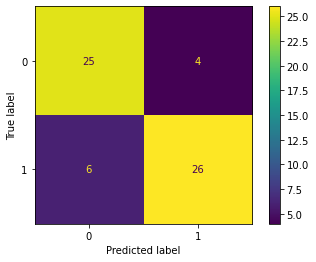

In [138]:
plot_confusion_matrix(log_model_all, x_test, y_test)
plt.show()

**Logistic Regression Model Using GLM Features:**

In [130]:
log_model_glm = LogisticRegression()

In [131]:
log_model_glm.fit(x_glm_train, y_train)

LogisticRegression()

In [133]:
preds = log_model_glm.predict(x_glm_test)

In [134]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



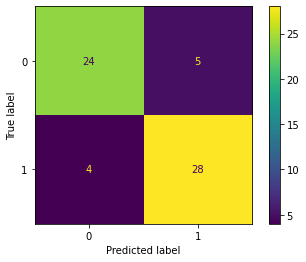

In [139]:
plot_confusion_matrix(log_model_glm, x_glm_test, y_test)
plt.show()

- There's not a Significant Improvement in Overall Accuracy of Model with using Only Significant Features.

#### 6.2) Random Forest Classifier:

**Random Forest Classifier Using All Features:**

In [136]:
rf_model_all = RandomForestClassifier()

rf_model_all.fit(x_train, y_train)

preds = rf_model_all.predict(x_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



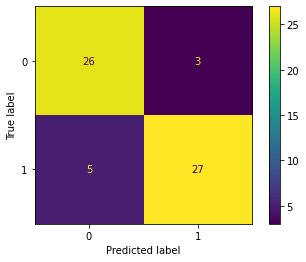

In [140]:
plot_confusion_matrix(rf_model_all, x_test, y_test)
plt.show()

**Random Forest Classifier Using GLM Features:**

In [137]:
rf_model_glm = RandomForestClassifier()

rf_model_glm.fit(x_glm_train, y_train)

preds = rf_model_glm.predict(x_glm_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



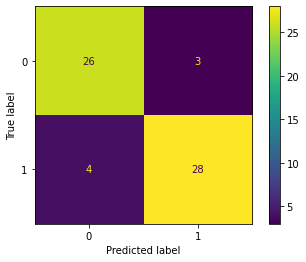

In [141]:
plot_confusion_matrix(rf_model_glm, x_glm_test, y_test)
plt.show()

- Same as in Logistic Regression, Not a Significant Improvement in Accuracy of Model Using only Significant Features.

**We should use Significant Features Found using GLM to Train and Build Model to Predict CVD as it uses less features to Provide same Rate of Accuracy.**

## Extra:

**Running Grid Search for All Models and Comparing Accuracies**

### Model Fitting and Evaluation Function:

In [142]:
def model_fit_eval(model, param_dict):
    '''
    This Function will Take in Model and Parameter Dictionary as Input Parameters.
    Prints Concise Report about Model Performance.
    
    Grid Search Will Run on Significant Features Selected Using GLM.
    '''
    
    grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv=5)
    
    grid_model.fit(x_glm_train, y_train)
    
    print("Best Parameters:\n")
    
    print(grid_model.best_params_)
    
    print("\n")
    
    pred = grid_model.predict(x_glm_test)
    
    print(classification_report(y_test, pred))
    
    plot_confusion_matrix(grid_model.best_estimator_, x_glm_test, y_test)

**1) Grid Search on Logistic Regression:**

In [143]:
log_model = LogisticRegression()

In [144]:
param_dict = {"penalty" : ["l1", "l2", "elasticnet"], "C" : np.logspace(0, 5, 10),
                                     "l1_ratio" : [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]}

Best Parameters:

{'C': 1.0, 'l1_ratio': 0, 'penalty': 'l2'}


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



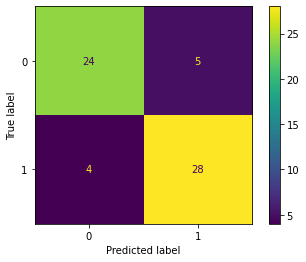

In [151]:
model_fit_eval(log_model, param_dict)

**Grid Search on Support Vector Classifier:**

In [152]:
svc = SVC()

In [153]:
param_dict = {"kernel" : ["linear", "rbf", "poly", "sigmoid"],
             "C" : [0.01, 0,1, 1, 10, 100],
             "degree" : [1,2,3], "gamma" : ["scale", "auto"]}

Best Parameters:

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



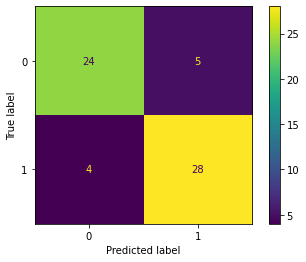

In [154]:
model_fit_eval(svc, param_dict)

**Grid Search on KNN Classifier:**

In [157]:
knn = KNeighborsClassifier()

In [158]:
param_dict = {"n_neighbors" : list(range(1,15)), 
             "metric" : ["euclidean", "cosine", "manhattan","minkowski"]}

Best Parameters:

{'metric': 'manhattan', 'n_neighbors': 8}


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



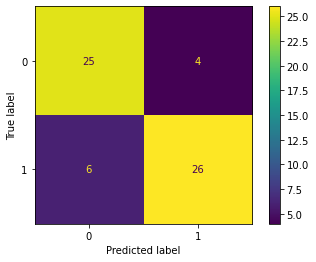

In [159]:
model_fit_eval(knn, param_dict)

**Grid Search on Decision Tree Classifier:**

In [160]:
dt = DecisionTreeClassifier()

In [161]:
param_dict = {"criterion" : ["gini", "entropy"],
             "splitter" : ["best","random"]}

Best Parameters:

{'criterion': 'gini', 'splitter': 'best'}


              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



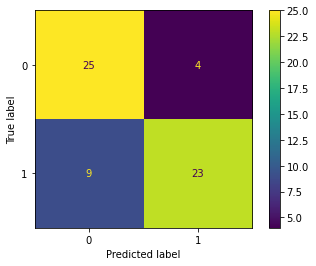

In [162]:
model_fit_eval(dt, param_dict)

**Grid Search on Random Forest Classifier:**

In [163]:
rf = RandomForestClassifier()

In [164]:
param_dict = {"n_estimators" : range(1,25),
             "criterion" : ["gini", "entropy"],
             "max_features" : [2,3,4],
             "bootstrap" : [True, False],
             "oob_score" : [True,False]}

Best Parameters:

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 4, 'n_estimators': 9, 'oob_score': False}


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



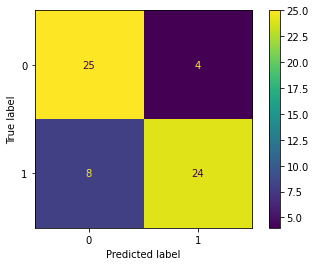

In [165]:
model_fit_eval(rf, param_dict)

**Grid Search on AdaBoost Classifier:**

In [166]:
adc = AdaBoostClassifier()

In [167]:
param_dict = {"n_estimators" : range(1,25),
             "learning_rate" : [0.01, 0.1, 1, 10],
             "algorithm" : ["SAMME","SAMME.R"]}

Best Parameters:

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 6}


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



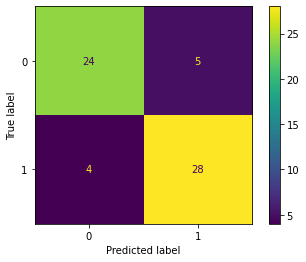

In [168]:
model_fit_eval(adc, param_dict)

**Grid Search on Gradient Boost Classifier:**

In [169]:
gbc = GradientBoostingClassifier()

In [170]:
param_dict = {"n_estimators": range(1,25),
              "max_depth": [3,4,5,6],
             "max_features": ["auto", "sqrt", "log2"]}

Best Parameters:

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 8}


              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



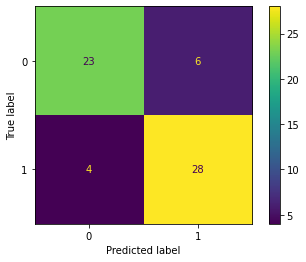

In [171]:
model_fit_eval(gbc, param_dict)